Confusion Matrix:
 [[23127   838]
 [15291   744]]

Accuracy:  0.596775

Precision:  [0.6019834452600343, 0.47029077117572693]

Recall:  [0.9650323388274568, 0.046398503274087934]

Tree Visualization


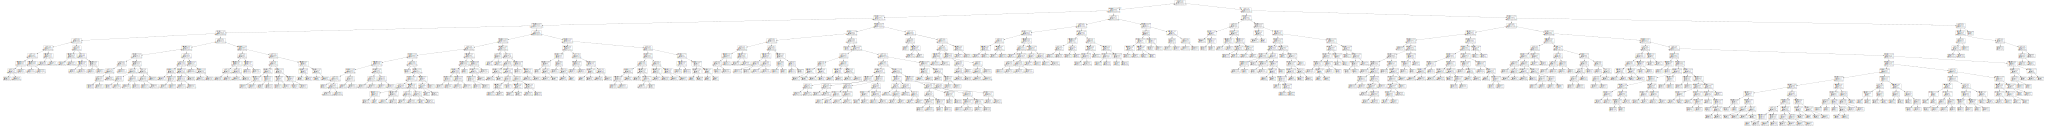

In [11]:
# %load DecisionTreeInduction.py
# Name: Sanchita Kanade
# Red Id: 822108710
# Class: CS653 Data Mining And Knowledge (Spring 2019)
# file: DecisionTreeInduction.py
# Final project 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
 
# loading data    
df = pd.read_csv (r'BlackFriday.csv')

# randomly selecting 200000 samples from dataframe.
df = df.sample(100000) 

# selecting important features from the dataframe into featureVector
featureVector = pd.DataFrame(df, columns= ['Occupation','Marital_Status','Age','Gender'])

# creating labels 
outputVector = pd.DataFrame(df,columns = ['Purchase'])

##### converting a label vector into binary values based on whether it is larger or smaller than the threshold ####

output = np.zeros(shape=(len(outputVector),1)) 

#threshold is the average of purchases
threshold = np.mean(outputVector['Purchase'])

# converting outputVector into binary values
for i in range(0, len(outputVector)):
    if(outputVector.iloc[i,0] >= threshold):
        output[i] = 1
    else:
        output[i] = 0
       

    
# converting Gender values from string to integer data type   
featureVector['Gender'] = featureVector['Gender'].map({'M': 0, 'F': 1}) 

# converting Age values from string to integer.
featureVector['Age'] = featureVector['Age'].map({'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6})

# dividing data into training and testing datasets.
trainX = featureVector.iloc[0:60000] 
trainY = output[0:60000]
testX = featureVector.iloc[60000:100000]
testY = output[60000:100000]

# training Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="gini").fit(trainX,trainY)

# testing Decision Tree Classifier
predY = clf.predict(testX)

# calculating evaluation metrics
acc = accuracy_score(testY,predY)

#confusion matrix calculation
cfm = confusion_matrix(testY, predY,labels =[0,1])
print('Confusion Matrix:\n',cfm)
print('\nAccuracy: ',acc)

# calculating per class precision and per class recall
precision = []
recall = []
precision.append(cfm[0,0]/(cfm[0,0] + cfm[1,0]))
precision.append(cfm[1,1]/(cfm[0,1] + cfm[1,1]))
recall.append(cfm[0,0]/(cfm[0,0]+cfm[0,1]))
recall.append(cfm[1,1]/(cfm[1,0]+cfm[1,1]))

print('\nPrecision: ',precision)
print('\nRecall: ',recall)

# Decision tree visualization

# Note: Decision tree is huge, 
# so some times it feels like there is no output, to see the whole tree please scroll down

print("\nTree Visualization (Please scroll down)")
graph = Source( tree.export_graphviz(clf, out_file=None, feature_names=['Occupation','Marital_Status','Age','Gender']))
SVG(graph.pipe(format='svg'))
